In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [41]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [42]:
strava.columns

Index(['average_heartrate', 'average_temp', 'average_watts', 'device_watts',
       'distance', 'elapsed_time', 'elevation_gain', 'kudos', 'moving_time',
       'workout_type'],
      dtype='object')

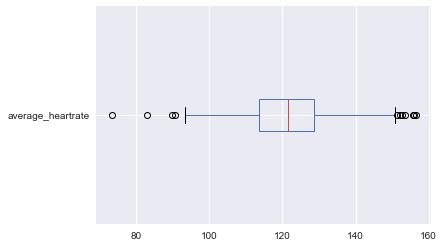

In [43]:
strava['average_heartrate'].plot.box(vert=False)

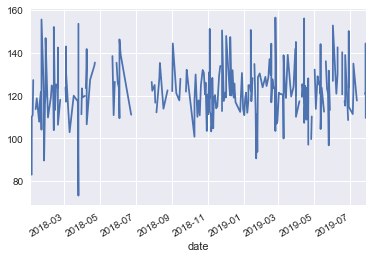

In [44]:
strava['average_heartrate'].plot()

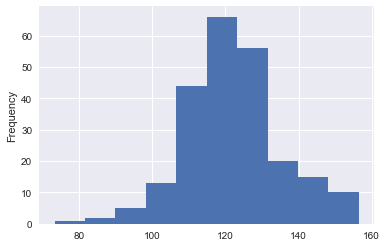

In [45]:
strava['average_heartrate'].plot.hist()

In [46]:
strava.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2018-01-02 20:47:51+00:00 to 2019-07-27 23:55:13+00:00
Data columns (total 10 columns):
average_heartrate    232 non-null float64
average_temp         204 non-null float64
average_watts        254 non-null float64
device_watts         260 non-null object
distance             268 non-null float64
elapsed_time         268 non-null int64
elevation_gain       268 non-null object
kudos                268 non-null int64
moving_time          268 non-null int64
workout_type         268 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 23.0+ KB


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [47]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [48]:
cheetah.columns

Index(['date', 'time', 'filename', 'axPower', 'aPower Relative Intensity',
       'aBikeScore', 'Skiba aVI', 'aPower Response Index', 'aIsoPower', 'aIF',
       ...
       'Rest AVNN', 'Rest SDNN', 'Rest rMSSD', 'Rest PNN50', 'Rest LF',
       'Rest HF', 'HRV Recovery Points', 'NP', 'IF', 'TSS'],
      dtype='object', length=362)

The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [49]:
strava.join(cheetah, how='inner' )

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
    
* Some of the rides are designated as "Race" in the `workout_type` field, these are where I am racing and you might expect that these would be the most challenging rides.  Normalised Power (NP) is a good measure of how hard a ride is.  Explore the values of `NP` for races vs the overall set of rides to see if this hypothesis is supported (use graphs and summary statistics).  Are races more challenging than rides in general? 

* It is useful to see a summary of rides over the year. Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate another summary graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


In [50]:
joined_df=(strava.join(cheetah, how='inner' ))

In [51]:
joined_df.sample()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2019-02-08 19:17:31+00:00,124.5,20.0,130.2,True,59.8,194,579.00 m,18,139,Ride,...,0,0,0,0,0,0,0,199.015,0.74259,128.9


In [71]:
joined_df.columns

Index(['average_heartrate', 'average_temp', 'average_watts', 'device_watts',
       'distance', 'elapsed_time', 'elevation_gain', 'kudos', 'moving_time',
       'workout_type',
       ...
       'Rest AVNN', 'Rest SDNN', 'Rest rMSSD', 'Rest PNN50', 'Rest LF',
       'Rest HF', 'HRV Recovery Points', 'NP', 'IF', 'TSS'],
      dtype='object', length=372)

In [52]:
true_df= joined_df[joined_df['device_watts'] == True]

In [53]:
joined_df['device_watts'].unique()

array([True, False, nan], dtype=object)

In [54]:
true_df

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


In [55]:

def skewness(x): 
    res = 0 
    m = x.mean() 
    s = x.std() 
    for i in x: 
        res += (i-m) * (i-m) * (i-m) 
        res /= (len(x) * s * s * s) 
        return res


In [56]:
distance_df=joined_df['distance']

In [57]:
skewness(distance_df)

-0.0066701001432674335

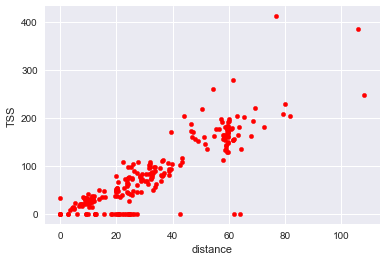

In [58]:
joined_df.plot(kind='scatter', x='distance',y='TSS',color='red')
plt.show()

In [59]:
joined_df.describe()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
count,214.000000,185.000000,233.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.000000,243.000000,243.000000
mean,122.618224,14.551351,164.600429,32.727160,119.399177,11.222222,81.691358,173.388909,0.646973,74.529356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188.234827,0.702369,84.815907
std,13.082045,5.871709,33.199033,21.390973,124.885936,5.430249,49.698091,79.687303,0.297341,65.095939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.792701,0.320122,73.295821
min,73.300000,0.000000,103.700000,0.000000,13.000000,2.000000,10.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,113.950000,10.000000,138.300000,15.200000,48.500000,7.000000,46.000000,169.683500,0.633148,25.444500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.650500,0.700187,28.393900
50%,121.650000,15.000000,159.500000,27.800000,68.000000,10.000000,64.000000,199.367000,0.743910,63.882200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.207000,0.806743,72.222900
75%,129.025000,19.000000,187.600000,53.350000,188.000000,15.500000,134.000000,218.862000,0.816649,124.425000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.519500,0.878804,146.735000
max,156.500000,31.000000,272.500000,108.200000,666.000000,24.000000,236.000000,284.994000,1.063410,386.246000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302.396000,1.128340,412.071000


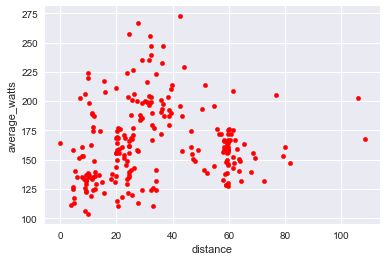

In [60]:
joined_df.plot(kind='scatter', x='distance',y='average_watts',color='red')

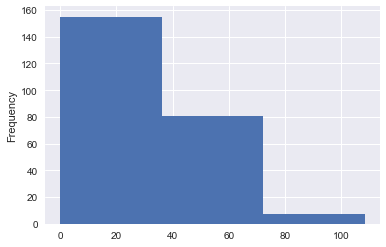

In [61]:
joined_df['distance'].plot.hist(bins=3)

Text(0.5, 0, 'distance')

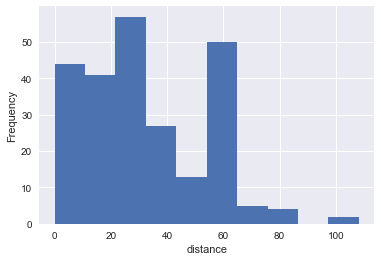

In [62]:
joined_df['distance'].plot.hist()
plt.xlabel('distance')

In [63]:
joined_df.skew(axis=0, skipna=True)

average_heartrate      0.135448
average_temp          -0.138575
average_watts          0.721977
device_watts          -2.061194
distance               0.616377
                         ...   
Rest HF                0.000000
HRV Recovery Points    0.000000
NP                    -1.486573
IF                    -1.486573
TSS                    1.016523
Length: 367, dtype: float64

In [64]:
joined_df['distance'].corr(joined_df['moving_time'])

0.9192349053747003

In [65]:
joined_df['NP'].corr(joined_df['average_heartrate'])

0.3751988307028401

In [68]:
import seaborn as sns
from pandas import DataFrame

In [72]:
indexes = DataFrame(joined_df, columns = ['distance','moving_time','average_speed', 'average_heartrate','average_power','NP', 'elevation_gain'])
print(indexes)

                           distance  moving_time  average_speed  \
2018-01-27 19:39:49+00:00       7.6           17            NaN   
2018-01-27 20:01:32+00:00      38.6           67            NaN   
2018-01-31 21:13:34+00:00      26.3          113            NaN   
2018-02-05 21:06:42+00:00      24.3           65            NaN   
2018-02-07 06:59:05+00:00      47.1          134            NaN   
...                             ...          ...            ...   
2019-07-19 20:22:49+00:00      58.2          136            NaN   
2019-07-26 20:12:56+00:00      59.6          139            NaN   
2019-07-27 20:42:59+00:00      19.8           47            NaN   
2019-07-27 21:47:24+00:00      29.1           50            NaN   
2019-07-27 23:55:13+00:00      20.2           59            NaN   

                           average_heartrate  average_power       NP  \
2018-01-27 19:39:49+00:00              120.6            NaN  222.856   
2018-01-27 20:01:32+00:00              146.9       

[Text(0.5, 0, 'distance'),
 Text(1.5, 0, 'moving_time'),
 Text(2.5, 0, 'average_speed'),
 Text(3.5, 0, 'average_heartrate'),
 Text(4.5, 0, 'average_power'),
 Text(5.5, 0, 'NP')]

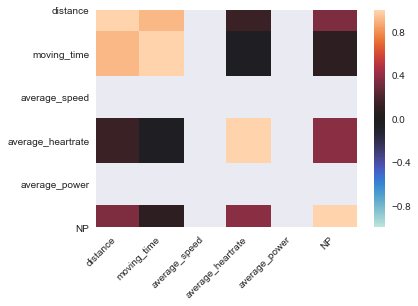

In [73]:
corr =indexes.corr()
ax = sns.heatmap(corr, vmin = -1,vmax=1,center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

[Text(0.5, 0, 'average_heartrate'),
 Text(15.5, 0, 'aVI'),
 Text(30.5, 0, 'Athlete Bodyfat'),
 Text(45.5, 0, 'Average Core Temperature'),
 Text(60.5, 0, 'Min Heartrate'),
 Text(75.5, 0, 'Average Right Pedal Smoothness'),
 Text(90.5, 0, 'Calories (HR)'),
 Text(105.5, 0, 'Efficiency Factor'),
 Text(120.5, 0, 'H6 Time in Zone'),
 Text(135.5, 0, 'Left/Right Balance'),
 Text(150.5, 0, 'P5 Percent in Pace Zone'),
 Text(165.5, 0, '10 min Peak Pace'),
 Text(180.5, 0, '20 min Peak Pace Swim'),
 Text(195.5, 0, 'Best 5000m'),
 Text(210.5, 0, 'Power Zone'),
 Text(225.5, 0, '20 min Peak Power'),
 Text(240.5, 0, '8 min Peak Hr'),
 Text(255.5, 0, 'Swim Pace'),
 Text(270.5, 0, 'L8 Sustained Time'),
 Text(285.5, 0, 'L7 Time in Zone'),
 Text(300.5, 0, 'TRIMP(100) Points'),
 Text(315.5, 0, '30 min Peak WPK'),
 Text(330.5, 0, "W1 W'bal Low Fatigue"),
 Text(345.5, 0, 'pNN5'),
 Text(360.5, 0, 'Rest LF')]

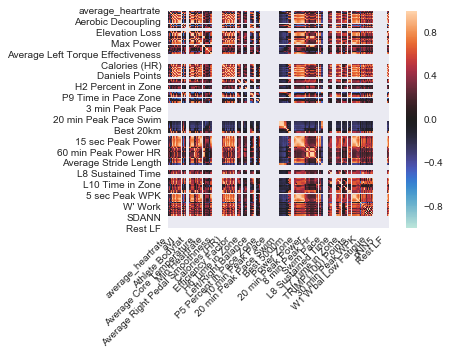

In [28]:
corr =joined_df.corr()
ax = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

In [29]:
import numpy as np

In [30]:
np.corrcoef(joined_df.distance, joined_df.moving_time)

array([[1.        , 0.91923491],
       [0.91923491, 1.        ]])

In [31]:
races_df = joined_df[joined_df['workout_type'] == 'Race']

In [32]:
races_df['NP']

2018-01-27 20:01:32+00:00    245.365
2018-02-10 20:46:02+00:00    244.500
2018-02-17 20:02:38+00:00      0.000
2018-03-03 20:02:23+00:00    270.462
2018-03-24 20:45:44+00:00    240.085
2018-04-07 21:47:39+00:00    275.057
2018-05-26 21:02:16+00:00    247.956
2018-06-02 21:02:59+00:00    248.693
2018-09-01 21:44:17+00:00    242.918
2018-11-03 20:46:32+00:00    245.789
2018-11-24 20:53:26+00:00    231.614
2018-12-01 20:47:11+00:00    242.935
2018-12-08 20:01:56+00:00    245.859
2019-01-12 21:04:16+00:00    282.911
2019-02-16 20:02:30+00:00    245.639
2019-02-23 20:46:12+00:00    291.809
2019-03-09 20:03:00+00:00    235.363
2019-03-30 20:47:49+00:00    274.337
2019-04-13 21:45:01+00:00    287.379
2019-04-20 21:03:17+00:00    252.962
2019-04-27 21:04:04+00:00    262.147
2019-05-11 21:46:02+00:00    273.058
2019-05-25 22:05:48+00:00    237.934
2019-06-01 22:54:55+00:00    271.443
2019-06-09 22:46:40+00:00    262.836
2019-06-22 22:33:45+00:00    261.623
2019-06-29 00:01:08+00:00    277.967
2

In [33]:
joined_df.corr()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
average_heartrate,1.000000,-0.121186,0.691528,0.139204,-0.125077,0.372500,-0.043981,0.400497,0.400496,0.176212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375199,0.375199,0.162631
average_temp,-0.121186,1.000000,-0.287577,0.012381,0.123471,-0.019307,0.105275,-0.259446,-0.259446,-0.075228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.251375,-0.251376,-0.076311
average_watts,0.691528,-0.287577,1.000000,0.105040,-0.161367,0.264645,-0.087983,0.543763,0.543762,0.261464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488740,0.488741,0.235187
distance,0.139204,0.012381,0.105040,1.000000,0.406222,0.743757,0.919235,0.336350,0.336350,0.869606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347391,0.347392,0.880188
elapsed_time,-0.125077,0.123471,-0.161367,0.406222,1.000000,0.266218,0.578826,-0.343756,-0.343756,0.202526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.332668,-0.332667,0.212700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rest HF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV Recovery Points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP,0.375199,-0.251375,0.488740,0.347391,-0.332668,0.241040,0.093727,0.994945,0.994945,0.588658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.591343
IF,0.375199,-0.251376,0.488741,0.347392,-0.332667,0.241040,0.093728,0.994945,0.994945,0.588659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.591344


In [34]:
joined_df.groupby('workout_type').median()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
workout_type,,,,,,,,,,,,,,,,,,,,,
Race,145.10,14.0,215.50,32.10,54.0,16.0,54.0,234.7840,0.876062,73.69025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.1700,0.959591,84.62545
Ride,119.95,15.0,151.35,26.15,93.5,10.0,81.5,189.9235,0.708670,48.39475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.3445,0.788600,57.35585
Workout,125.10,11.0,185.70,25.50,60.0,7.0,60.0,212.9850,0.794720,67.12280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.1090,0.836229,73.74900
